COVID-19 Clinical Trials Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-n

<ipython-input-2-05b3792b45fd>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid_data['Results First Posted'].fillna('Unknown', inplace=True)


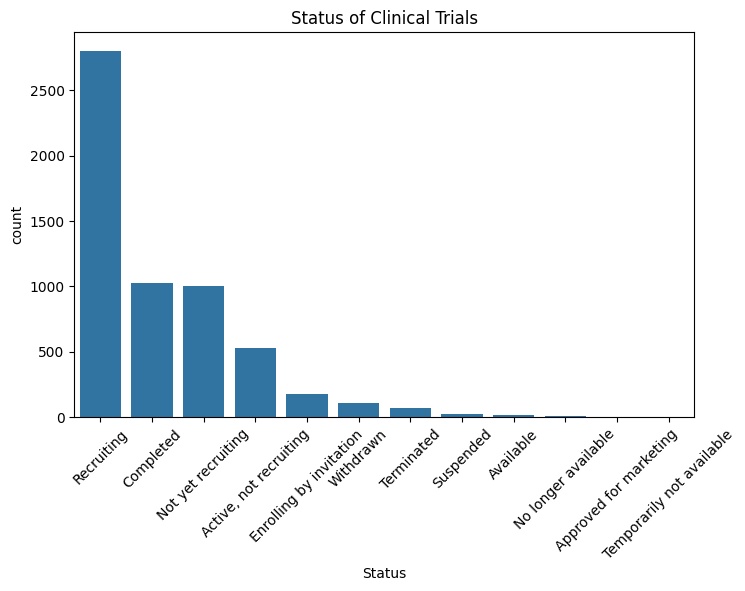

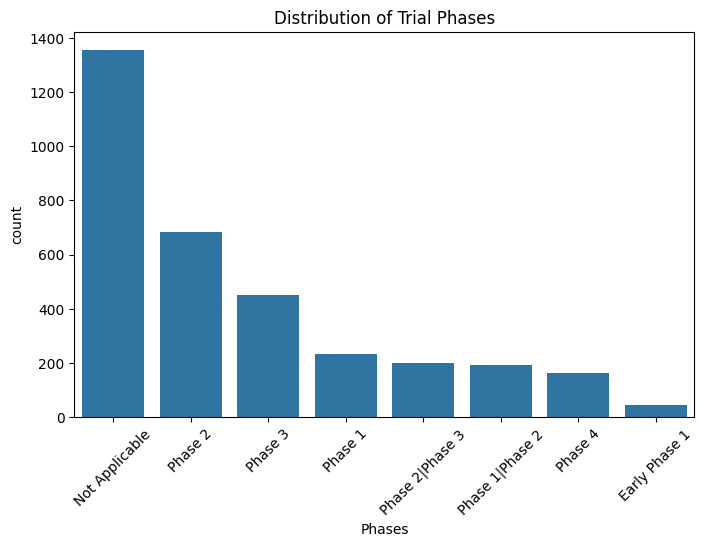

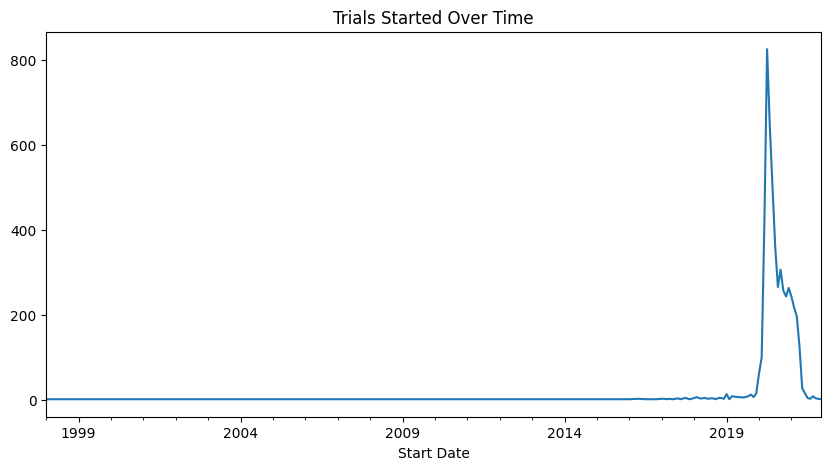

In [2]:
# Install required libraries
!pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace with actual file path)
covid_data = pd.read_csv('covid_data.csv')

# Display dataset information
print("COVID-19 Clinical Trials Dataset Overview:")
print(covid_data.info())

# Check for missing values
print("Missing Data:")
print(covid_data.isnull().sum())

# Drop columns with high missing values
covid_data.drop(columns=['Acronym', 'Study Documents'], inplace=True)

# Fill missing values in categorical columns
covid_data['Results First Posted'].fillna('Unknown', inplace=True)

# Status distribution visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='Status', data=covid_data, order=covid_data['Status'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Status of Clinical Trials")
plt.show()

# Phase distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Phases', data=covid_data, order=covid_data['Phases'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Trial Phases")
plt.show()

# Time Series Analysis: Trials started over time
covid_data['Start Date'] = pd.to_datetime(covid_data['Start Date'], errors='coerce')
covid_data['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', figsize=(10, 5), title='Trials Started Over Time')
plt.show()
